# 2021-07-30

## Riddler Express

Riddler Nation is competing against Conundrum Country at an Olympic archery event. Each team fires three arrows toward a circular target 70 meters away. Hitting the bull’s-eye earns a team 10 points, while regions successively farther away from the bull’s-eye are worth fewer and fewer points.

Whichever team has more points after three rounds wins. However, if the teams are tied after
each team has taken three shots, both sides will fire another three arrows. (If they remain tied, they will continue firing three arrows each until the tie is broken.)

For every shot, each archer of Riddler Nation has a one-third chance of hitting the bull’s-eye (i.e., earning 10 points), a one-third chance of earning 9 points and a one-third chance of earning 5 points.

Meanwhile, each archer of Conundrum Country earns 8 points with every arrow.

Which team is favored to win?

Extra credit: What is the probability that the team you identified as the favorite will win?

In [66]:
%matplotlib notebook

import random

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [69]:
conundrum = 8

def riddler_shot():
    i=random.randint(0, 2)
    if i == 0:
        return 10
    elif i == 1:
        return 9
    else:
        return 5
    
def riddler_shots(n):
    return sum(riddler_shot() for _ in range(n))

def conundrum_shots(n):
    return 8 * n

def game():
    score0 = riddler_shots(9)
    score1 = conundrum_shots(9)
    while score0 == score1:
        score0 += riddler_game(3)
        score1 += conundrum_shots(3)
    winner = None
    if score0 > score1:
        winner = 0
    else:
        winner = 1
    return (score0, score1, winner)

def games(n):
    score0 = []
    score1 = []
    winner = []
    for _ in range(n):
        s0, s1, w = game()
        score0.append(s0)
        score1.append(s1)
        winner.append(w)
    return pd.DataFrame({"score0": score0, "score1": score1, "winner": winner})

df=games(100000)
df

,score0,score1,winner
0,87,96,1
1,70,72,1
2,78,72,0
3,71,72,1
4,68,72,1
...,...,...,...
99995,71,72,1
99996,68,72,1
99997,65,72,1
99998,81,72,0


In [60]:
?sns.histplot

<IPython.core.display.Javascript object>


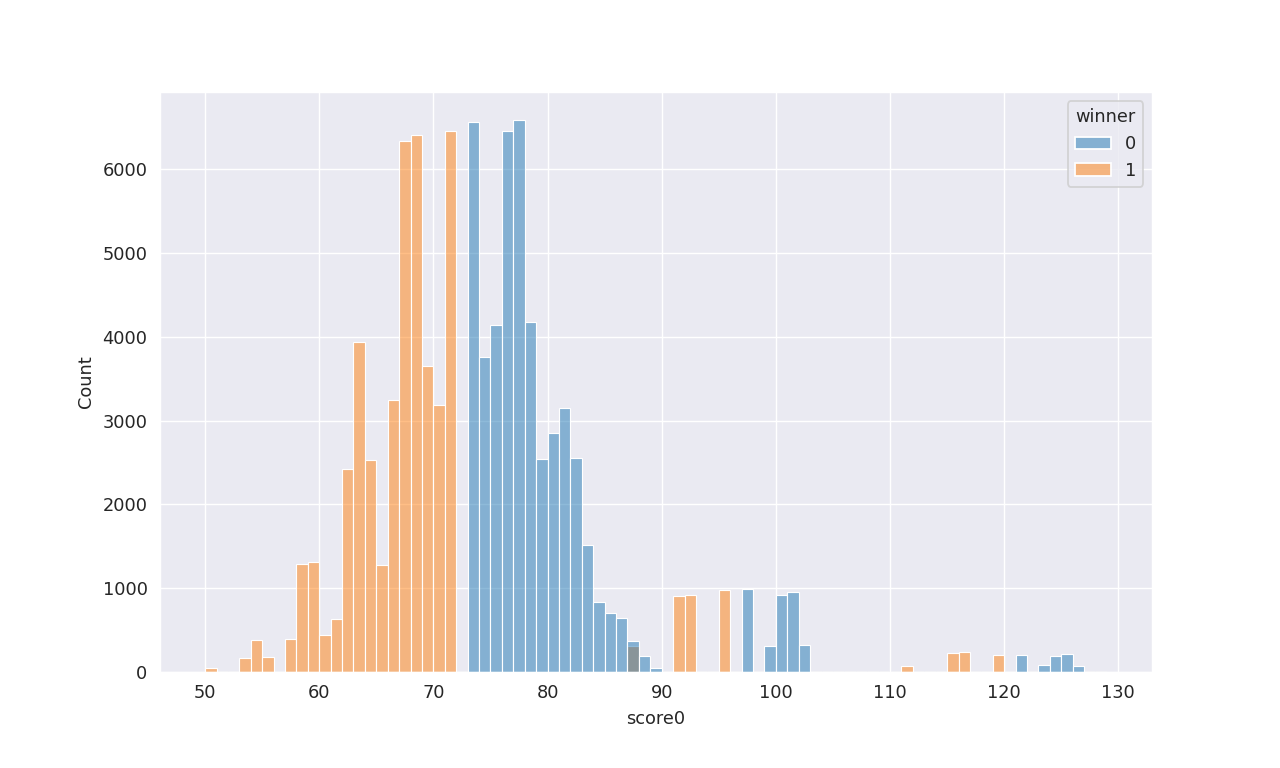

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=df["score0"], hue=df["winner"], bins=range(50, 130), ax=ax)
fig.show()

In [73]:
df[df["winner"] == 0]["winner"].count()

51596

In [74]:
df[df["winner"] == 1]["winner"].count()

48404

In [38]:
(1/3)*10+(1/3)*9+(1/3)*5

8.0

In [41]:
?sns

In [43]:
?sns.histplot

In [51]:
?sns.set_style